In [1]:
# feature selection
# filter/ whopper/ ensemble 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#import the weather info
df_weather = pd.read_csv('emaIST_2017_2018_2019.csv')
df_weather.head()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [5]:
# change the datatime format and set index
df_weather['Datetime'] = pd.to_datetime(df_weather['yyyy-mm-dd hh:mm:ss'])
df_weather = df_weather.set_index('Datetime')
df_weather = df_weather.drop(['yyyy-mm-dd hh:mm:ss'], axis = 1)
df_weather.head()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,
2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [6]:
# get the hourly average data
df_weather_hourly =  df_weather.resample('H').sum()/12
df_weather_hourly.head()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0


In [8]:
df_data1 = pd.read_csv('IST_South_Tower_2017_Ene_Cons.csv')
df_data2 = pd.read_csv('IST_South_Tower_2018_Ene_Cons.csv')
df_data_all=pd.concat([df_data1,df_data2])
# set the index to datetime and drop unused columns
df_data1['Datetime'] = pd.to_datetime(df_data1['Date_start'],dayfirst = True, errors='coerce')
df_data1 = df_data1.drop(['Date_start','Total_Ah','Date_end','Duration'], axis = 1)
df_data1 = df_data1.set_index('Datetime')
df_data2['Datetime'] = pd.to_datetime(df_data2['Date_start'], dayfirst = True, errors='coerce')
df_data2 = df_data2.drop(['Date_start','Total_Ah','Date_end','Duration'], axis = 1)
df_data2 = df_data2.set_index('Datetime')

# combine two dataframes
df_data=pd.concat([df_data1,df_data2])
df_data.head(5)

,Power_kW
Datetime,
2017-01-01 00:00:00,100.810001
2017-01-01 01:00:00,99.054135
2017-01-01 02:00:00,98.539567
2017-01-01 03:00:00,101.435784
2017-01-01 04:00:00,98.481665


In [9]:
# add some missing data and adjust the outliers
for i in range(len(df_data)):
    if df_data['Power_kW'][i] == 0:
        df_data['Power_kW'][i] = df_data['Power_kW'][i-8760]
    if df_data['Power_kW'][i] > 900:
        df_data['Power_kW'][i] = (df_data['Power_kW'][i-1]+df_data['Power_kW'][i+1])/2               
print(df_data.describe())

           Power_kW
count  17520.000000
mean     176.626674
std      113.232846
min       25.504849
25%      100.773402
50%      111.711839
75%      243.113096
max      671.567397


In [10]:
# get some average values for features
df_data['Avg_power_3']=df_data['Power_kW']-df_data['Power_kW']
df_data['Avg_power_6']=df_data['Avg_power_3']
for i in range(2,len(df_data)):
    df_data['Avg_power_3'][i]=(df_data['Power_kW'][i]+df_data['Power_kW'][i-1]+df_data['Power_kW'][i-2])/3
for i in range(5,len(df_data)):
    df_data['Avg_power_6'][i]=(df_data['Power_kW'][i]+df_data['Power_kW'][i-1]+df_data['Power_kW'][i-2]+df_data['Power_kW'][i-3]+df_data['Power_kW'][i-4]+df_data['Power_kW'][i-5])/6
df_data.head(5)

,Power_kW,Avg_power_3,Avg_power_6
Datetime,,,
2017-01-01 00:00:00,100.810001,0.000000,0.0
2017-01-01 01:00:00,99.054135,0.000000,0.0
2017-01-01 02:00:00,98.539567,99.467901,0.0
2017-01-01 03:00:00,101.435784,99.676495,0.0
2017-01-01 04:00:00,98.481665,99.485672,0.0


In [11]:
# check the weather info
df_weather_hourly.tail()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,
2019-04-11 11:00:00,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0
2019-04-11 12:00:00,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0
2019-04-11 13:00:00,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0
2019-04-11 14:00:00,14.442500,42.002500,0.0,0.0,936.000000,572.983333,0.0,0.0
2019-04-11 15:00:00,2.548333,6.958333,0.0,0.0,170.166667,86.625000,0.0,0.0


In [12]:
# resample data by week
df_data_1=df_data.resample('W').sum()
df_data_1['week']=df_data_1.index.week
df_data_1.tail(10)

,Power_kW,Avg_power_3,Avg_power_6,week
Datetime,,,,
2018-11-04,26757.440517,26762.089323,26770.405688,44
2018-11-11,28242.983780,28242.812548,28245.948060,45
2018-11-18,29338.134622,29330.619751,29317.330727,46
2018-11-25,28417.860255,28427.731283,28441.419325,47
2018-12-02,28234.156816,28233.500952,28237.073901,48
2018-12-09,26386.261020,26388.167505,26387.312078,49
2018-12-16,26424.442584,26418.715480,26410.770056,50
2018-12-23,25549.581476,25560.267364,25574.831518,51
2018-12-30,18020.375409,18022.446279,18029.233800,52


In [13]:
df_data_2=df_data_1.iloc[:-1,:]
df_data_2.tail(10)

,Power_kW,Avg_power_3,Avg_power_6,week
Datetime,,,,
2018-10-28,30564.157131,30558.487639,30552.099573,43
2018-11-04,26757.440517,26762.089323,26770.405688,44
2018-11-11,28242.983780,28242.812548,28245.948060,45
2018-11-18,29338.134622,29330.619751,29317.330727,46
2018-11-25,28417.860255,28427.731283,28441.419325,47
2018-12-02,28234.156816,28233.500952,28237.073901,48
2018-12-09,26386.261020,26388.167505,26387.312078,49
2018-12-16,26424.442584,26418.715480,26410.770056,50
2018-12-23,25549.581476,25560.267364,25574.831518,51


In [14]:
df_data_weather = df_data.merge(df_weather_hourly,left_index=True,right_index=True)
df_data_weather.tail()

,Power_kW,Avg_power_3,Avg_power_6,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Datetime,,,,,,,,,,,
2018-12-31 19:00:00,97.217861,101.539354,104.063611,13.361667,54.013333,0.0,0.0,1031.000000,1.112333,0.0,0.0
2018-12-31 20:00:00,95.928710,99.464769,102.200899,12.810000,55.441667,0.0,0.0,1031.000000,1.322417,0.0,0.0
2018-12-31 21:00:00,85.652000,92.932857,98.244847,12.565000,55.291667,0.0,0.0,1031.000000,1.195500,0.0,0.0
2018-12-31 22:00:00,90.360675,90.647129,96.093241,11.926667,56.530000,0.0,0.0,1031.000000,1.117000,0.0,0.0
2018-12-31 23:00:00,81.954980,85.989218,92.726994,13.228333,67.725000,0.0,0.0,1202.833333,1.620083,0.0,0.0


In [15]:
# import the holiday info
df_holiday=pd.read_csv('holiday.csv')
df_holiday['Datetime']=pd.to_datetime(df_holiday['Date'],dayfirst = True, errors='coerce')
df_holiday = df_holiday.set_index('Datetime')
df_holiday = df_holiday.drop(['Date'], axis = 1)
df_holiday=df_holiday.iloc[:,:1]
df_holiday.head()

,holiday
Datetime,
2017-01-01 00:00:00,1
2017-01-01 01:00:00,1
2017-01-01 02:00:00,1
2017-01-01 03:00:00,1
2017-01-01 04:00:00,1


In [16]:
# merge the datasets
df_data_weather = df_data_weather.merge(df_holiday,left_index=True,right_index=True)
df_data_weather=df_data_weather.iloc[5:,:]
df_data_weather.head()

,Power_kW,Avg_power_3,Avg_power_6,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,holiday
Datetime,,,,,,,,,,,,
2017-01-01 05:00:00,97.805844,99.241098,99.354499,6.006417,81.008333,4.552833,6.079333,1028.0,1.375833,0.0,0.0,1
2017-01-01 06:00:00,94.464760,96.917423,98.296959,5.645833,80.441667,4.004417,5.346417,1027.0,0.988000,0.0,0.0,1
2017-01-01 07:00:00,94.983261,95.751288,97.618480,5.477750,80.191667,3.176250,4.654167,1027.0,1.466167,0.0,0.0,1
2017-01-01 08:00:00,104.622170,98.023397,98.632247,5.410250,80.358333,3.460917,4.402333,1027.0,29.549750,0.0,0.0,1
2017-01-01 09:00:00,101.362150,100.322527,98.619975,5.480583,80.091667,4.510750,5.680667,1027.0,76.494167,0.0,0.0,1


In [17]:
# create some features
df_data_weather['hour'] = df_data_weather.index.hour
df_data_weather['month']=df_data_weather.index.month
df_data_weather['weekday']=df_data_weather.index.weekday
df_data_weather['Power_kW-1']=df_data_weather.Power_kW.shift(1)
df_data_weather['Sqrt_Power-1']=np.sqrt(df_data_weather['Power_kW-1'])
df_data_weather['logPower-1']=np.log(df_data_weather['Power_kW-1'])
df_data_weather=df_data_weather.dropna()
df_data_weather.tail(5)

,Power_kW,Avg_power_3,Avg_power_6,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,holiday,hour,month,weekday,Power_kW-1,Sqrt_Power-1,logPower-1
Datetime,,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00,97.217861,101.539354,104.063611,13.361667,54.013333,0.0,0.0,1031.000000,1.112333,0.0,0.0,1,19,12,0,105.247736,10.259032,4.656317
2018-12-31 20:00:00,95.928710,99.464769,102.200899,12.810000,55.441667,0.0,0.0,1031.000000,1.322417,0.0,0.0,1,20,12,0,97.217861,9.859912,4.576954
2018-12-31 21:00:00,85.652000,92.932857,98.244847,12.565000,55.291667,0.0,0.0,1031.000000,1.195500,0.0,0.0,1,21,12,0,95.928710,9.794320,4.563605
2018-12-31 22:00:00,90.360675,90.647129,96.093241,11.926667,56.530000,0.0,0.0,1031.000000,1.117000,0.0,0.0,1,22,12,0,85.652000,9.254837,4.450293
2018-12-31 23:00:00,81.954980,85.989218,92.726994,13.228333,67.725000,0.0,0.0,1202.833333,1.620083,0.0,0.0,1,23,12,0,90.360675,9.505823,4.503809


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import  linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import gaussian_process
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
X=df_data_weather.values
y=X[:,0]
x=X[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#Y = np.array(Y, dtype=int)
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.18738335e-01 2.03855818e-02 2.48055361e-03 9.45449071e-04
 5.78505441e-04 6.25791983e-04 7.74502171e-04 6.02204148e-03
 1.17180995e-04 2.50963193e-04 2.39117638e-04 5.17847338e-02
 1.86971837e-03 1.77358157e-03 1.73915665e-01 1.39537792e-01
 1.79960486e-01]


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
features=SelectKBest(k=5)
fit=features.fit(x,y)
print(fit.scores_)
features_results=fit.transform(x)
print(features_results)

[40.49703432  7.03735722  1.64473889  1.37525797  1.12130217  1.14038213
  1.58854756  2.08862264  1.50803538  1.72515961  0.84877479  0.84018638
  1.08758272  0.92882941 30.19886099 29.72707653 27.24922728]
[[96.917423   98.29695917 97.805844    9.88968372  4.58298433]
 [95.7512885  97.61848025 94.4647605   9.71929835  4.54822686]
 [98.02339717 98.63224742 94.983261    9.74593561  4.55370068]
 ...
 [92.932857   98.24484692 95.9287105   9.79432032  4.56360532]
 [90.6471285  96.093241   85.652       9.25483657  4.45029258]
 [85.98921833 92.72699358 90.360675    9.50582322  4.50380916]]


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,5)# using 5 features

fit=rfe.fit(x,y)

print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [ 2  6  9 11  1  1 13 12  1 10  3  8  7  4  5  1  1]


In [25]:
from sklearn.model_selection import train_test_split
X=df_data_weather.values
y=X[:,0]
x=X[:,[3,11,12,13,14,15]] #temp, holiday, hour, month, weekday, power-1

X_train, X_test, y_train, y_test = train_test_split(x,y)
#y_train = np.array(y_train, dtype=int)

In [26]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)

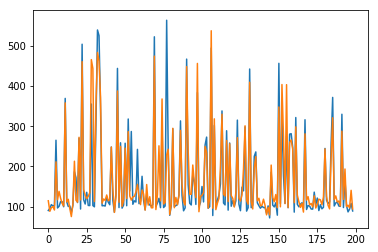

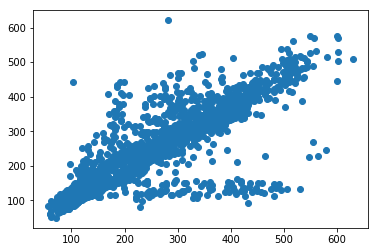

In [27]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [28]:
from sklearn import  metrics
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

25.26997166877662 2276.320214660245 47.71079767369484


In [30]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (40))
mlp.fit(X_train,y_train)
y_pred_NN = mlp.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


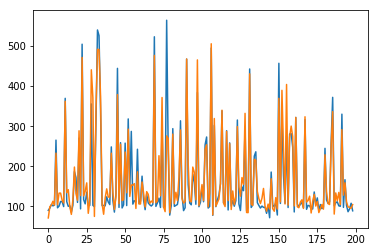

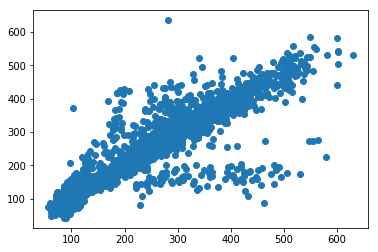

In [31]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [32]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

22.240896133158408 1811.1109402873958 42.5571491090204


In [33]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

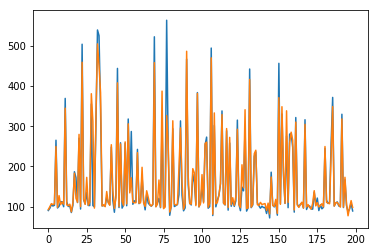

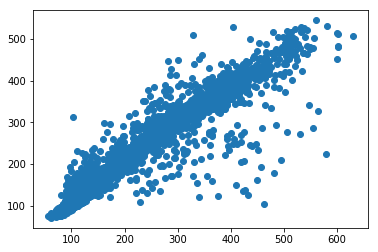

In [34]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [35]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

14.87186799803365 1047.1348967960048 32.35946379030414
